In [43]:
import underthesea
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from underthesea.pipeline import word_tokenize
import matplotlib.pyplot as plt

In [11]:
url = "../data/Data_comment.xlsx"
data = pd.read_excel(url)
data.head()

,Label,Data
0,2,thịt bò vẫn còn xơ
1,0,các bạn trẻ giờ rất giỏi chọn góc chụp hình nê...
2,0,không gian cũng nhỏ nữa
3,2,lần đầu ăn titi là ở trần huy liệu quán đông ă...
4,0,nhân viên thì tạp nham


In [12]:
len(data)

22026

In [13]:
dataset = np.array(data)
dataset

array([[2, 'thịt bò vẫn còn xơ'],
       [0,
        'các bạn trẻ giờ rất giỏi chọn góc chụp hình nên không gian quán ngoài đời có làm mình thất vọng nhẹ vì trang trí không được đẹp'],
       [0, 'không gian cũng nhỏ nữa'],
       ...,
       [2, 'món này tạm chấp nhận'],
       [0, 'ăn cũng không yên'],
       [0, 'trời hôm nay nhiều mây cực']], dtype=object)

In [14]:
labels =dataset[:,0]
review = dataset[:,1]
review

array(['thịt bò vẫn còn xơ',
       'các bạn trẻ giờ rất giỏi chọn góc chụp hình nên không gian quán ngoài đời có làm mình thất vọng nhẹ vì trang trí không được đẹp',
       'không gian cũng nhỏ nữa', ..., 'món này tạm chấp nhận',
       'ăn cũng không yên', 'trời hôm nay nhiều mây cực'], dtype=object)

In [15]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=object)

In [17]:
review = list(np.squeeze(review))
review

['thịt bò vẫn còn xơ',
 'các bạn trẻ giờ rất giỏi chọn góc chụp hình nên không gian quán ngoài đời có làm mình thất vọng nhẹ vì trang trí không được đẹp',
 'không gian cũng nhỏ nữa',
 'lần đầu ăn titi là ở trần huy liệu quán đông ăn ngon ấn tượng khoai mềm cắt miếng vừa ăn chứ không phải như miếng khoai tây chiên như ở chi nhánh này',
 'nhân viên thì tạp nham',
 'giá cả hơi cao so với những chỗ khác',
 'ấn tượng đầu tiên là cách bày trí của quán khá đẹp và sạch sẽ',
 'mấy món nem chua rán ngọc trong đá cua huỳnh đế ngon lắm ạ',
 'thất vọng nhất là nem lụi bị nhiều bột thành ra bở gia vị cũng không ngon',
 'rẻ',
 'mắm nêm thơm dậy mùi dứa cay dịu vừa miệng',
 'trung bình mỗi xuất là 90 nghìn',
 'bánh gọi bánh hội an nhân có thịt gà rau sống chả giò cà rốt thịt quay',
 'giá cả không quá mắc',
 'không gian quán khá thoáng mát và rộng',
 'về chất lượng thì ngan ít mỡ mà chắc thịt rất ngon',
 'rau rất tươi',
 'giá cả hơi cao so với những chỗ khác',
 'mình nghĩ nên bóc vỏ ăn ngon hơn',
 '

In [18]:
#đọc file stopword
stopword=pd.read_csv("../data/vietnamese-stopwords-dash.txt",header=None,names=['Stopwords'])
stopword = list(stopword['Stopwords'])

In [19]:
def vn_tokenizer(sequence_list) -> list:
    toked_sequence = list(map(lambda x: underthesea.word_tokenize(x), sequence_list))
    return toked_sequence

In [20]:
def remove_stopword(sequence, stopword_list) -> list:
    for word in sequence:
        if word in stopword:
            sequence.remove(word)
    return sequence

In [22]:
def create_vocabulary(sequence_list) -> dict:
    vocabulary = {}
    i = 1
    for sequence in sequence_list:
        for word in sequence:
            if word not in vocabulary:
                vocabulary[word] = i
                i += 1
    return vocabulary

In [23]:
def map_word_to_num(sequence_list, vocabulary) -> list:
    mapped_sequence_list = []
    for sequence in sequence_list:
        text = list(map(lambda x: vocabulary[x], sequence))
        mapped_sequence_list.append(text)
    return mapped_sequence_list

In [24]:
def find_max_length(sequence_list) -> int:
    len_list = []
    for sequence in sequence_list:
        len_list.append(len(sequence))
    max_length = np.max(len_list)
    return max_length

In [25]:
def sequence_padding(sequence_list, max_length, padded_value) -> list:
    for sequence in sequence_list:
        while len(sequence) < max_length:
            sequence.append(padded_value)
    return sequence_list

In [ ]:
toked_sequence = vn_tokenizer(review)
sequence_without_sw = remove_stopword(toked_sequence, stopword)
vocab = create_vocabulary(sequence_without_sw)
num_sequence = map_word_to_num(sequence_without_sw, vocab)
max_length = find_max_length(num_sequence)
padded_sequence = sequence_padding(num_sequence, max_length, 0)
padded_sequence

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_sequence, labels, test_size=0.2)

In [35]:
#train_size = int(len(x_train)*0.85)
#x_val = np.array(x_train[train_size:])
#y_val = np.array(y_train[train_size:])
#x_train = np.array(x_train[:train_size])
#y_train = np.array(y_train[:train_size])
x_train = np.array(x_train).astype('float32')
y_train = np.array(y_train).astype('float32')
x_test = np.array(x_test).astype('float32')
y_test = np.array(y_test).astype('float32')

In [36]:
print(len(x_train))
print(len(x_test))

17620
4406


In [37]:
y_train = tf.one_hot(y_train, 9)
y_test = tf.one_hot(y_test, 9)

2022-05-18 16:05:28.544568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 16:05:28.554694: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 16:05:28.554866: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (intern-mvhung-1): /proc/driver/nvidia/version does not exist
2022-05-18 16:05:28.862735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
vocab_size = len(vocab)
embedding_dim = 64

In [41]:
model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(100)))

model.add(keras.layers.Dense(9,activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 132, 64)           395648    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              132000    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 9)                 1809      
                                                                 
Total params: 529,457
Trainable params: 529,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_history = model.fit(x_train, y_train , validation_split=0.2,batch_size=32 , epochs=5)

In [43]:
def show_plot(train_history):
  plt.plot(train_history.history['accuracy'])
  plt.plot(train_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(train_history.history['loss'])
  plt.plot(train_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

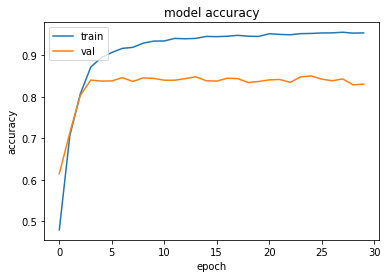

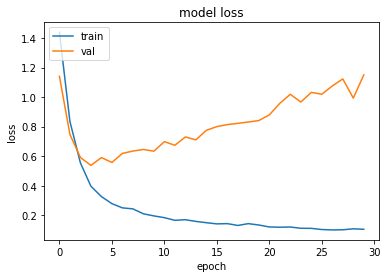

In [44]:
show_plot(train_history)

In [45]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
52/52 [==============================] - 2s 41ms/step - loss: 1.1471 - accuracy: 0.8370
test loss, test acc: [1.1470521688461304, 0.8370157480239868]
Generate predictions for 3 samples
predictions shape: (3, 9)


In [46]:
predictions.argmax(axis=1)

array([1, 4, 0])

In [47]:
label_names = ['tào lao', 'ngon', 'dở', 'giá cao', 'giá hợp lý', 
               'vệ sinh sạch sẽ, thực phẩm an toàn', 'vệ sinh bẩn, không đảm bảo', 
               'thái độ phục vụ tốt', 'thái độ phục vụ tệ']

In [46]:
def classify(text):
    toked_sequence = vn_tokenizer(text)
    sequence_without_sw = remove_stopword(toked_sequence, stopword)
    num_sequence = map_word_to_num(sequence_without_sw, vocab)
    padded_sequence = sequence_padding(num_sequence, max_length, 0)
    padded_sequence = np.array(padded_sequence).astype("float32")
    pred = model.predict(padded_sequence)
    classes = [label_names[i] for i in list(pred.argmax(axis=1))]
    return classes

In [53]:
import string
import re
text = ["ngon"]
pred = classify(text)
pred

1/1 [==============================] - 0s 87ms/step


['dở']

In [50]:
#model.save("/content/drive/MyDrive/2021-2022/NLP/Model/r_cnn_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/2021-2022/NLP/Model/r_cnn_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/2021-2022/NLP/Model/r_cnn_model/assets


In [48]:
model = keras.models.load_model("../model")